In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes import param
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
plt.style.use(Cstyle.style1)
import time
from matplotlib import gridspec

In [2]:
p128 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
Lin128 = LinData.LinData_Class(p128)
strvar, var_all128 = RPlot.get_slice_iterations(p128)
var_all128 = np.delete(var_all128, 1)
f128 = [RPlot.get_slice_data(p128, strvar, v) for v in var_all128]
x128 = np.arange(-p128['Lx']/2, p128['Lx']/2, p128['dx'])*np.sqrt(3)
var_all128

 read time file


array([ 1.  , 35.26, 40.  , 45.  , 47.52, 48.01, 49.  , 49.97, 51.02,
       51.97, 53.  , 54.02, 55.03, 55.87])

$\mathcal{H} = {}^{(3)}R + \frac{2}{3}K^2 - 2A^2 - 2\kappa\rho - 2\Lambda$

$-\dot{K}+\frac{1}{3}K^2+2A^2+\frac{\kappa\rho}{2}-\Lambda=0$

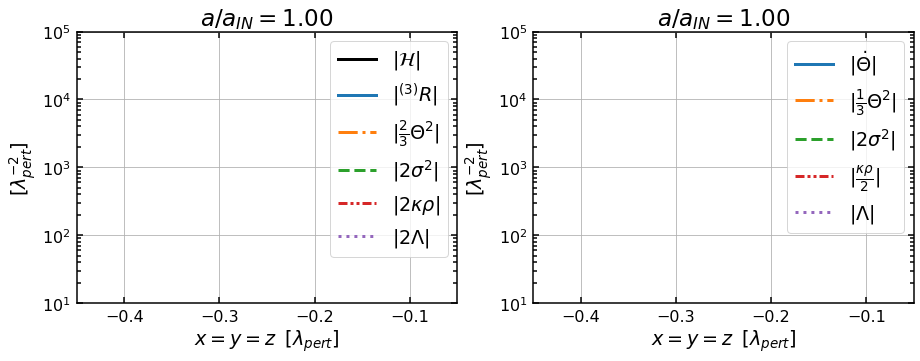

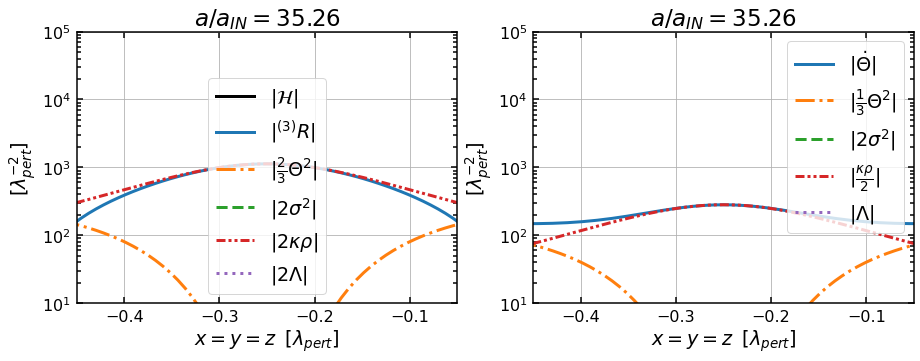

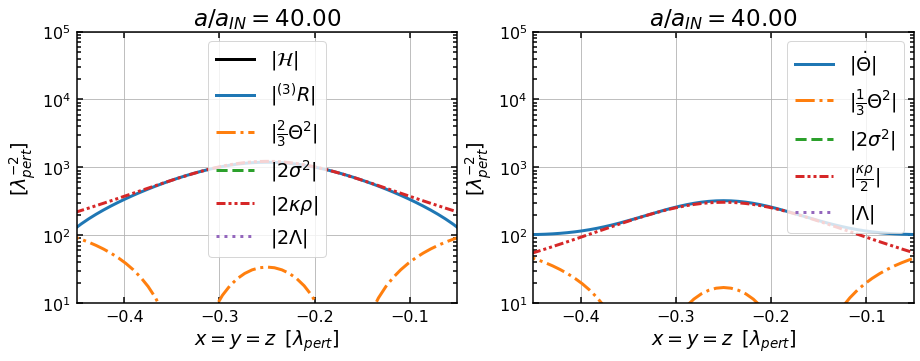

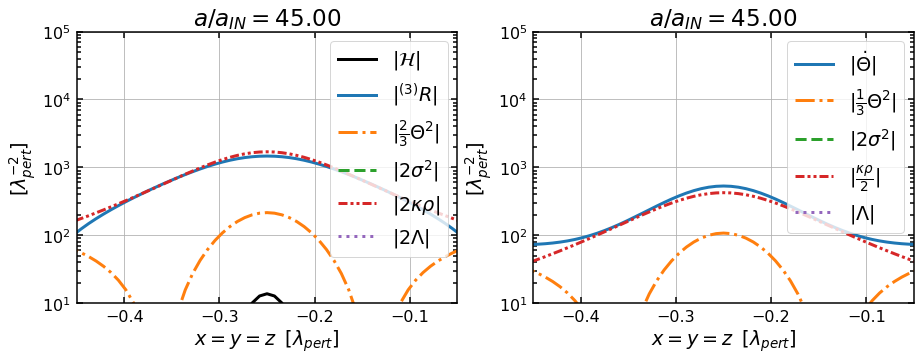

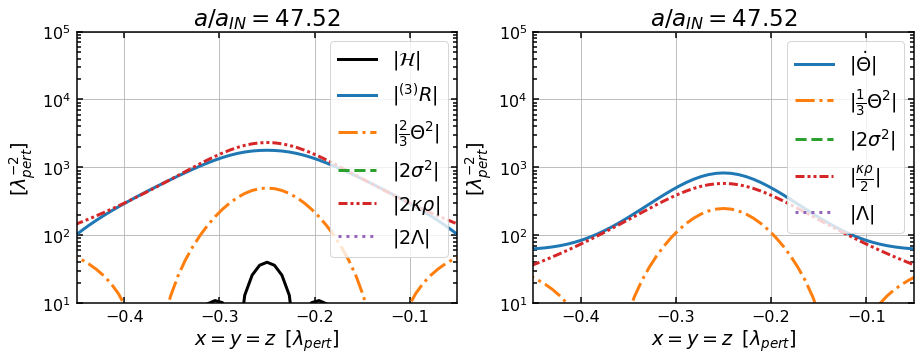

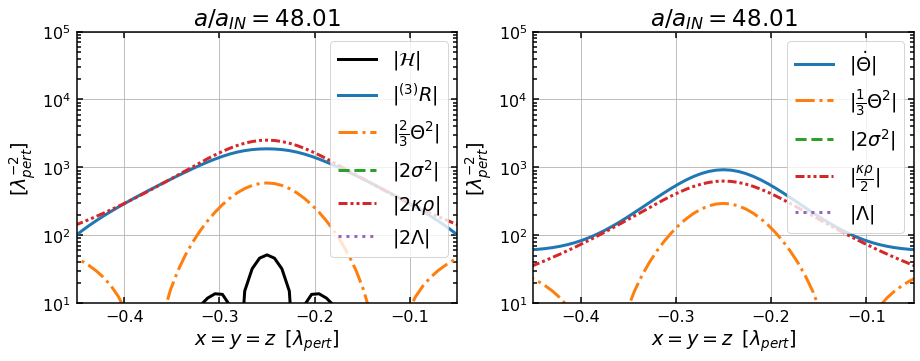

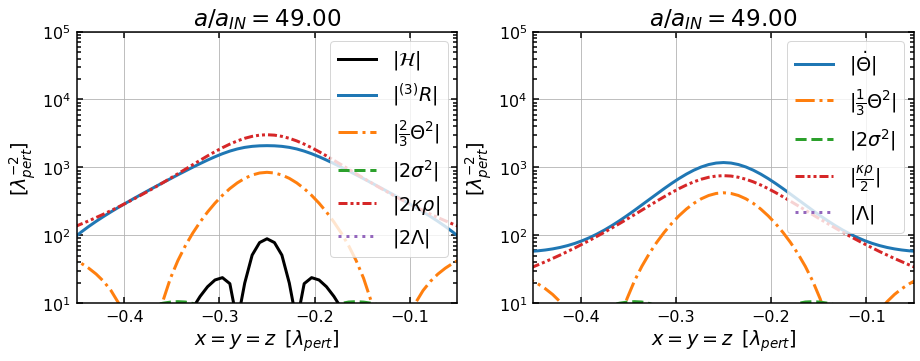

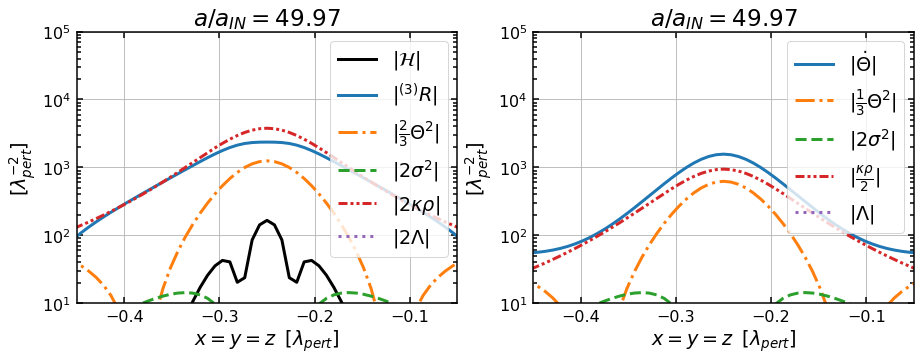

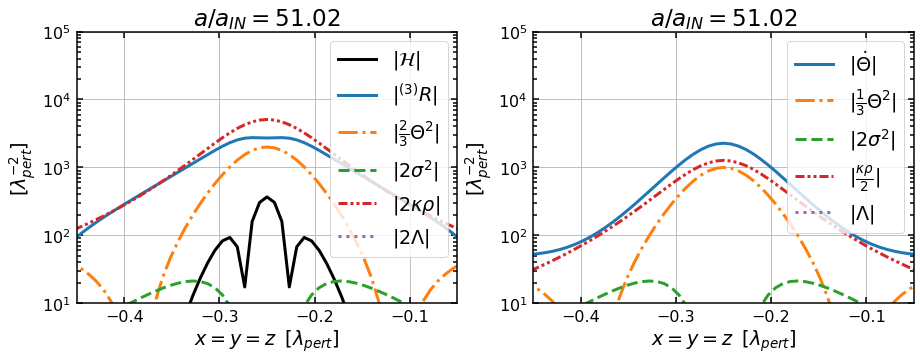

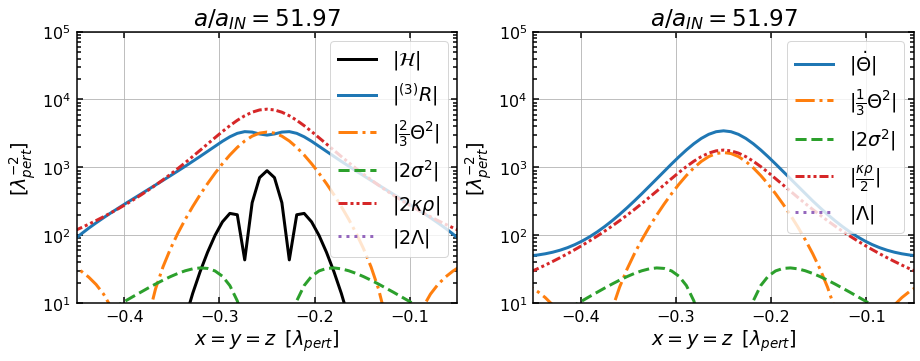

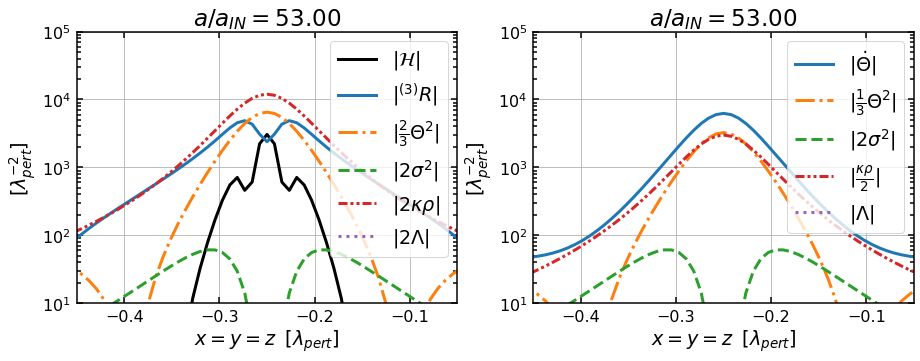

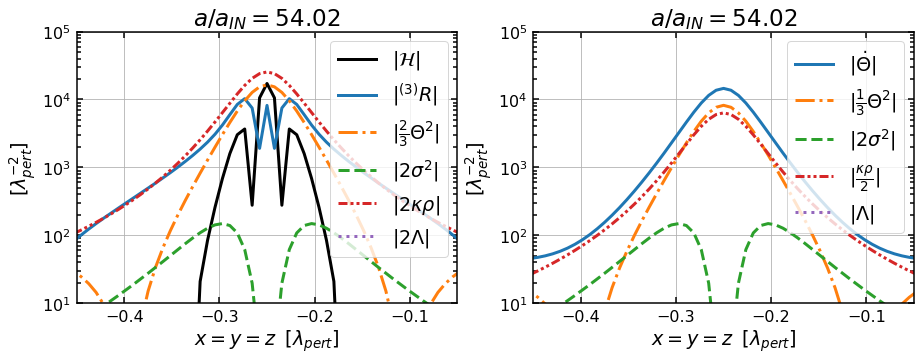

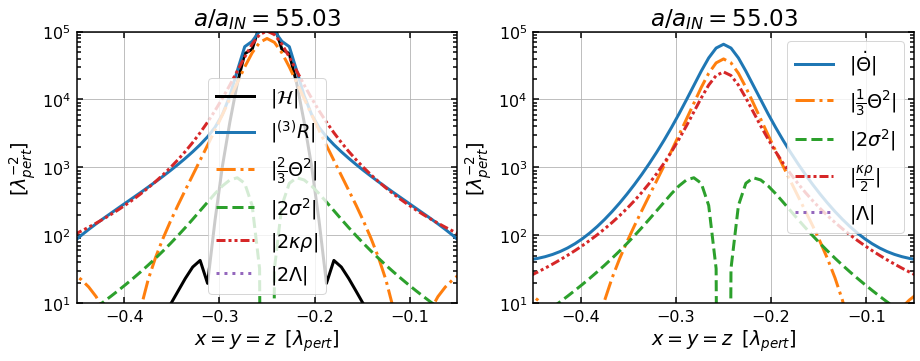

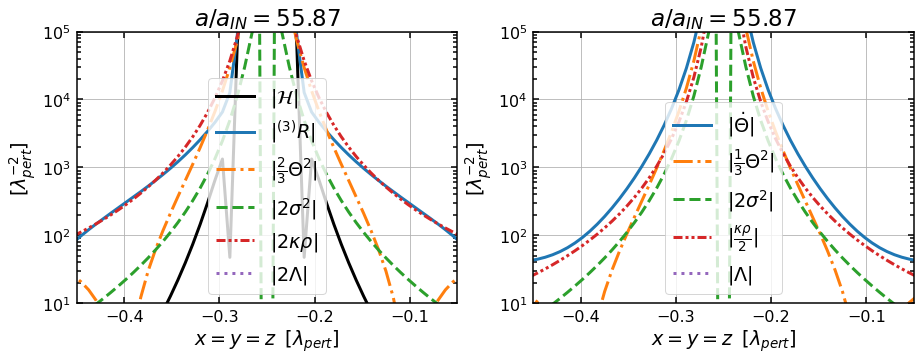

In [11]:
L = p128['Lx']
L2 = L*L
x = x128/(L*np.sqrt(3))
for it in range(14):
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    H = (f128[it]['RicciS']
        + (2/3)*f128[it]['K']**2
        - 2*f128[it]['A2']
        - 2*Lin128.evo.kappa*f128[it]['rho']
        - 2*Lin128.evo.Lambda)
    plt.semilogy(x, abs(H)*L2, linestyle='-', color='k', label=r'$|\mathcal{H}|$')
    plt.semilogy(x, abs(f128[it]['RicciS'])*L2, linestyle='-', color='C0', label=r'$|{}^{(3)}R|$')
    plt.semilogy(x, abs((2/3)*f128[it]['K']**2)*L2, linestyle='-.', color='C1', label=r'$|\frac{2}{3}\Theta^2|$')
    plt.semilogy(x, abs(2*f128[it]['A2'])*L2, linestyle='--', color='C2', label=r'$|2\sigma^2|$')
    plt.semilogy(x, abs(2*Lin128.evo.kappa*f128[it]['rho'])*L2, linestyle=(0,(3,1,1,1,1,1)), color='C3', label=r'$|2\kappa\rho|$')
    plt.semilogy(x, [abs(2*Lin128.evo.Lambda)*L2]*len(x128), linestyle=':', color='C4', label=r'$|2\Lambda|$')

    plt.title(r'$a/a_{IN}=$'+'{:.2f}'.format(var_all128[it]))
    plt.grid()
    plt.ylabel(r'$[\lambda_{pert}^{-2}]$')
    plt.xlabel(r'$x = y = z \;\;[\lambda_{pert}]$')
    plt.ylim(10, 100000)
    plt.xlim(-0.45, -0.05)
    plt.legend()
    
    
    plt.subplot(122)
    dtK = ((1/3)*f128[it]['K']**2
         + 2*f128[it]['A2']
         + Lin128.evo.kappa*f128[it]['rho']/2
         - Lin128.evo.Lambda)
    plt.semilogy(x, abs(dtK)*L2, linestyle='-', color='C0', label=r'$|\dot{\Theta}|$')
    plt.semilogy(x, abs((1/3)*f128[it]['K']**2)*L2, linestyle='-.', color='C1', label=r'$|\frac{1}{3}\Theta^2|$')
    plt.semilogy(x, abs(2*f128[it]['A2'])*L2, linestyle='--', color='C2', label=r'$|2\sigma^2|$')
    plt.semilogy(x, abs(Lin128.evo.kappa*f128[it]['rho']/2)*L2, linestyle=(0,(3,1,1,1,1,1)), color='C3', label=r'$|\frac{\kappa\rho}{2}|$')
    plt.semilogy(x, [abs(Lin128.evo.Lambda)*L2]*len(x128), linestyle=':', color='C4', label=r'$|\Lambda|$')

    plt.title(r'$a/a_{IN}=$'+'{:.2f}'.format(var_all128[it]))
    plt.grid()
    plt.ylabel(r'$[\lambda_{pert}^{-2}]$')
    plt.xlabel(r'$x = y = z \;\;[\lambda_{pert}]$')
    plt.ylim(10, 100000)
    plt.xlim(-0.45, -0.05)
    plt.legend()